   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35200 entries, 0 to 35199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              35200 non-null  int64 
 1   Gender                  35200 non-null  object
 2   Age                     35200 non-null  int64 
 3   Annual Income (k$)      35200 non-null  int64 
 4   Spending Score (1-100)  35200 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ MB
None
         CustomerID           Age  Annual Incom

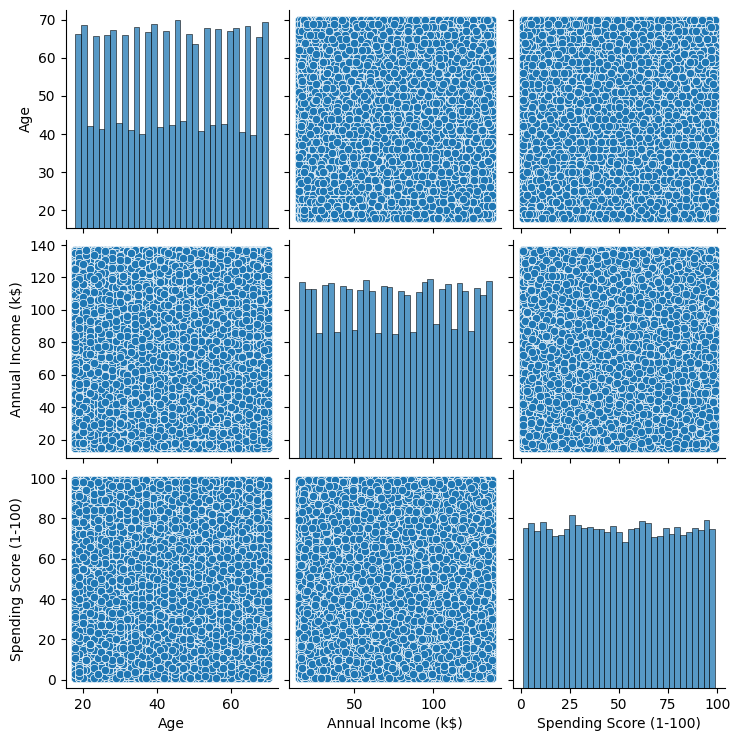

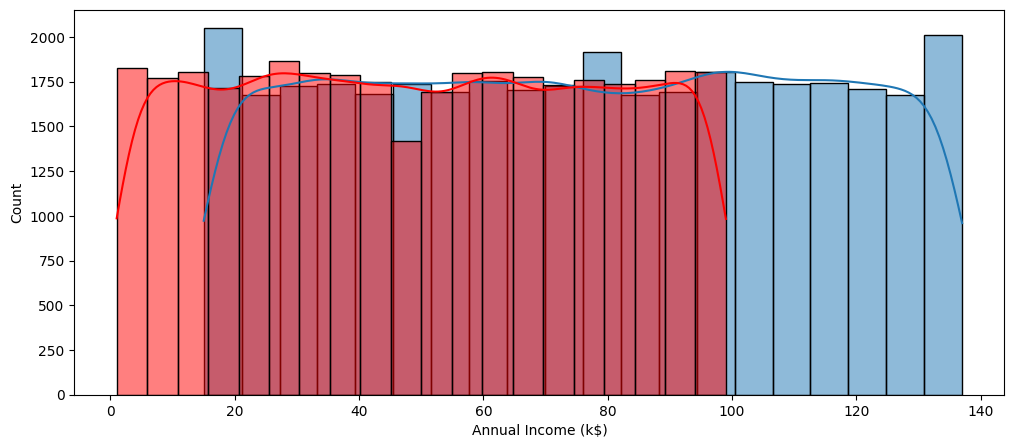

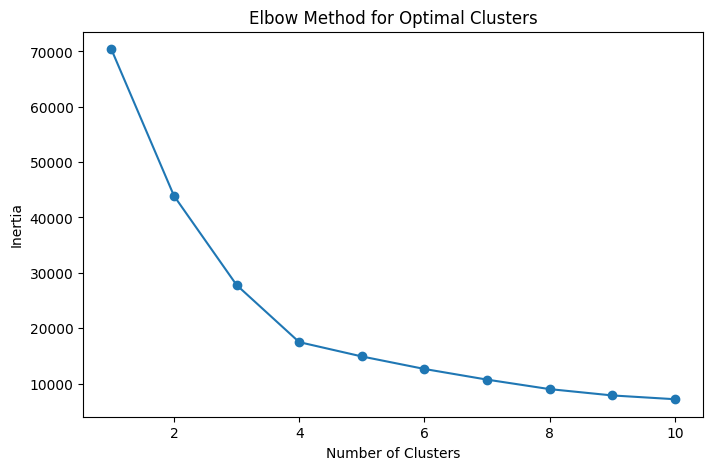

Silhouette Score: 0.38137179314826347


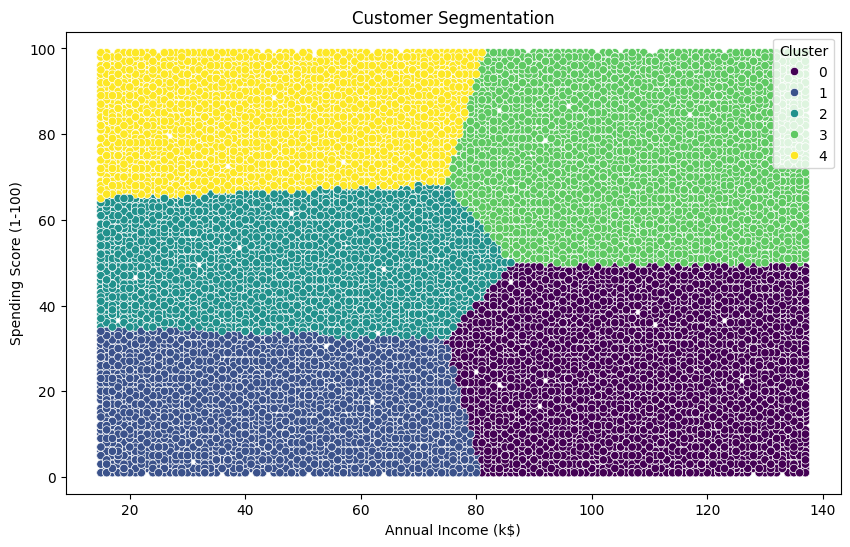

Cluster Centers:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                107.873074               24.671842
1                 45.887439               16.656632
2                 48.491605               50.056645
3                108.515322               74.699785
4                 45.438408               83.404557


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load Dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 2: Explore Dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Step 4: Data Visualization
sns.pairplot(df.drop(columns=['CustomerID']))
plt.show()

# Histograms
plt.figure(figsize=(12,5))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.show()

# Step 5: Data Preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Determine Optimal Clusters (Elbow Method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Step 7: Apply K-Means Clustering
optimal_clusters = 5  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 8: Silhouette Score Evaluation
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Step 9: Visualizing Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

# Step 10: Cluster Analysis
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Centers:\n", cluster_means)
